# Inferential Statistics Notebook

## Introduction

Inferential statistics allow us to make predictions or inferences about a population based on a sample of data taken from that population. It contrasts with descriptive statistics, which simply describe the characteristics of a given dataset. Inferential statistics are crucial in hypothesis testing, estimating population parameters, and making predictions.

## Main Concepts

### 1. Population vs. Sample

- **Population**: The entire group that you want to draw conclusions about.
- **Sample**: A subset of the population that is used to represent the entire group.

### Example

In [7]:
import numpy as np

# Simulating a population
# We create a population of 10000 people with a mean age of 35 and a standard deviation of 10
population_ages = np.random.normal(loc=35, scale=10, size=10000) # mean=35, std=10




### 2. Sampling Distribution

The distribution of a statistic (like the mean) calculated from samples of a given size drawn from the same population.

### Example



In [2]:
# Taking a sample
sample_ages = np.random.choice(population_ages, size=100, replace=False)

In [3]:
# Save the sample mean
sample_mean = np.mean(sample_ages)
print(f"Mean of the sample: {sample_mean}")
# Save the standard deviation of the sample
sample_std = np.std(sample_ages)
print(f"Standar dev of the sample: {sample_std}")
# Save the standard deviation of the mean
sample_std_mean = np.std(sample_ages) / np.sqrt(100)
print(f"Standar dev of the mean: {sample_std_mean}")
# Save the standard error of the mean
sem = sample_std / np.sqrt(100)
print(f"Standar error of the mean: {sem}")



Mean of the sample: 35.15926019477076
Standar dev of the sample: 30.801591550904753
Standar dev of the mean: 3.080159155090475
Standar error of the mean: 3.080159155090475


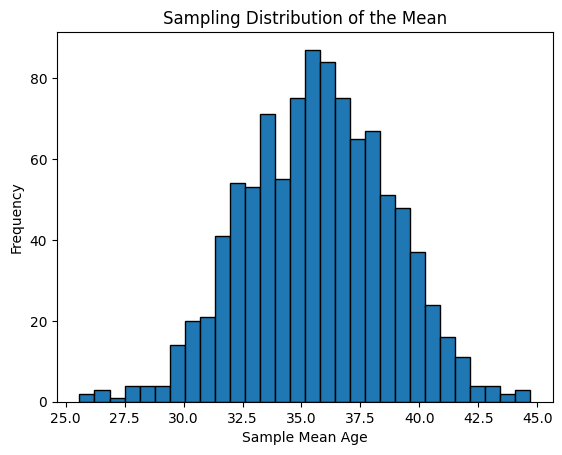

In [4]:

sample_means = [np.random.choice(population_ages, 100).mean() for _ in range(1000)]
# Plotting the sampling distribution of the mean
import matplotlib.pyplot as plt

plt.hist(sample_means, bins=30, edgecolor='k')
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean')
plt.show()



### 3. Hypothesis Testing

A method of making decisions using data, whether from a controlled experiment or an observational study.

- **Null Hypothesis (H0)**: The default position that there is no relationship between two measured phenomena.
- **Alternative Hypothesis (H1)**: The hypothesis that there is a relationship.

### Example



In [5]:
# Calculate manually the t-statistic
print(sample_mean)
print(sample_std)
print((sample_std / np.sqrt(100)))
t_statistic_manual = (sample_mean - 35) / (sample_std / np.sqrt(100))
print(f"Manual T-test: {t_statistic_manual}")

34.807898856533605
9.095295103290722
0.9095295103290721
Manual T-test: -0.21120935745877248


In [6]:
from scipy import stats

# Hypothesis: The mean age of our sample is different from the population mean of 35
sample_mean = np.mean(sample_ages)
t_statistic, p_value = stats.ttest_1samp(sample_ages, 35)

print(f"T-test: {t_statistic}, P-value: {p_value}")


T-test: -0.21015065727083995, P-value: 0.8339819870648402




### 4. Confidence Intervals

A range of values, derived from the sample statistics, that is likely to contain the value of an unknown population parameter.

### Example



In [7]:
confidence_level = 0.95
degrees_freedom = len(sample_ages) - 1
sample_mean = np.mean(sample_ages)
sample_standard_error = stats.sem(sample_ages)
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (32.971851769337825, 36.643945943729385)




### 4. Chi-Square Test

### Example



In [22]:
# Step 1: State the Hypotheses
# The null hypothesis is that the die is fair (i.e., all outcomes are equally likely).
# The alternative hypothesis is that the die is not fair.

# Step 2: Collect Data
# Let's say we roll a six-sided die 60 times and get the following observed frequencies:
observed_frequencies = np.array([4, 6, 17, 16, 8, 9])

#observed_frequencies = np.array([12, 9, 11, 8, 10, 10])

# If the die is fair, we expect each outcome to occur equally. So, the expected frequency for each outcome is:
expected_frequencies = np.array([10, 10, 10, 10, 10, 10])

In [23]:
# Step 3: Calculate the Chi-square Statistic
# The Chi-square statistic is calculated as the sum of the squared difference between observed and expected frequencies,
# divided by the expected frequency, for all outcomes.
chi_square_statistic = np.sum(((observed_frequencies - expected_frequencies) ** 2) / expected_frequencies)
print("Chi-square Statistic:", chi_square_statistic)

Chi-square Statistic: 14.200000000000001


<Figure size 1000x500 with 0 Axes>

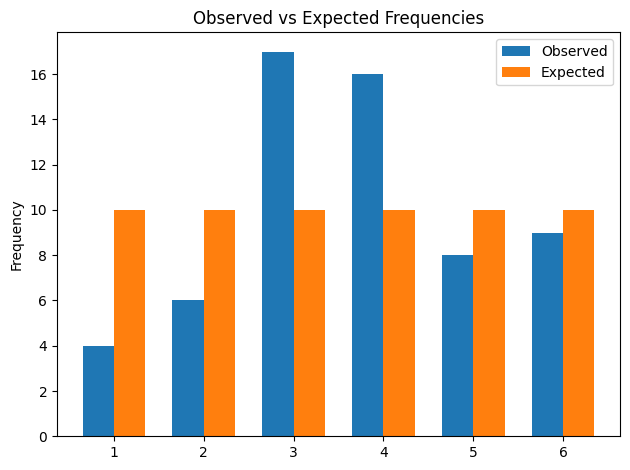

In [24]:
# Plotting the observed and expected frequencies
plt.figure(figsize=(10, 5))
labels = ['1', '2', '3', '4', '5', '6']
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, observed_frequencies, width, label='Observed')
rects2 = ax.bar(x + width/2, expected_frequencies, width, label='Expected')

ax.set_ylabel('Frequency')
ax.set_title('Observed vs Expected Frequencies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

In [25]:
# Step 4: Find the P-value
# The P-value is the probability of observing a Chi-square statistic as extreme as, or more extreme than, the observed statistic
# under the null hypothesis. We use the chi2 distribution from scipy.stats with degrees of freedom = number of outcomes - 1.
df = len(observed_frequencies) - 1
p_value = 1 - stats.chi2.cdf(chi_square_statistic, df)
print("P-value:", p_value)

P-value: 0.014387678176921326


In [26]:
# Step 5: Make a Decision
# If the P-value is less than our chosen significance level (let's say 0.05), we reject the null hypothesis.
if p_value < 0.05:
    print("We reject the null hypothesis and conclude that the die is not fair.")
else:
    print("We do not reject the null hypothesis and conclude that the die is fair.")

We reject the null hypothesis and conclude that the die is not fair.




### 5. ANOVA

### Example



In [13]:
#ANOVA tests the null hypothesis that the means of the groups are all equal

# Create three groups of data
group1 = np.array([20, 23, 21, 25, 18, 17, 18, 24, 20, 24])
group2 = np.array([28, 31, 30, 29, 28, 30, 27, 31, 30, 29])
group3 = np.array([30, 29, 31, 32, 33, 31, 30, 33, 32, 31])

# Perform the ANOVA
f_val, p_val = stats.f_oneway(group1, group2, group3)

print("F-value:", f_val)
print("P-value:", p_val)

F-value: 75.15894039735113
P-value: 9.231061222180742e-12


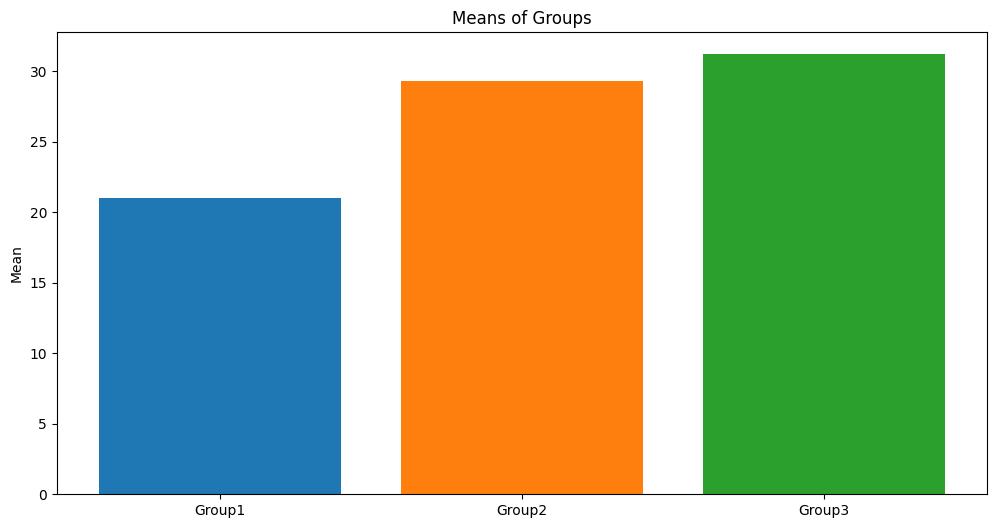

In [9]:
# Plot the means of each group
plt.figure(figsize=(12, 6))

# Create an array with the colors you want to use
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Set your custom color palette
plt.bar(["Group1", "Group2", "Group3"], [np.mean(group1), np.mean(group2), np.mean(group3)], color=colors)
plt.ylabel('Mean')
plt.title('Means of Groups')
plt.show()



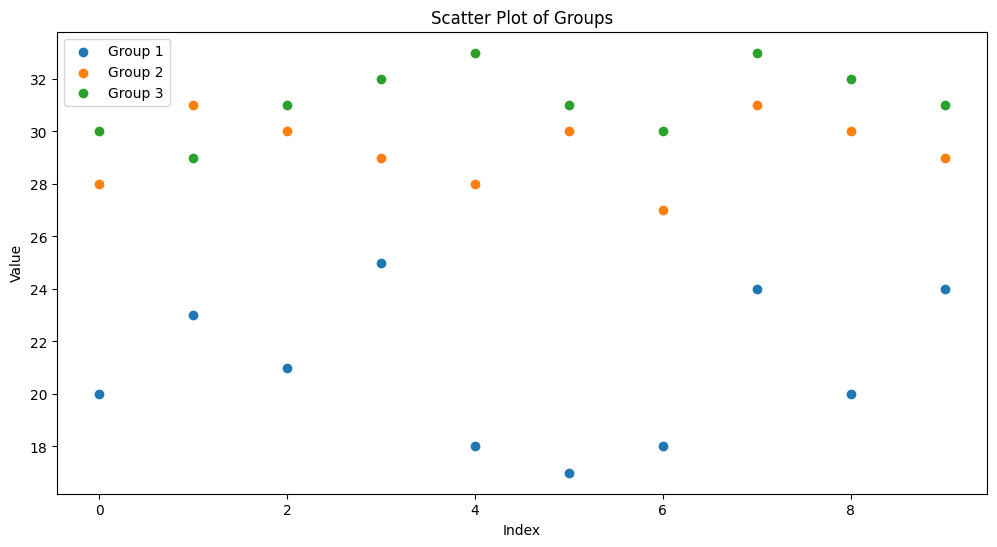

In [11]:
# Create a scatter plot with the data, each group in a different color
plt.figure(figsize=(12, 6))
# Create an array with the colors you want to use
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# Set your custom color palette
plt.scatter(range(10), group1, color=colors[0], label='Group 1')
plt.scatter(range(10), group2, color=colors[1], label='Group 2')
plt.scatter(range(10), group3, color=colors[2], label='Group 3')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot of Groups')
plt.legend()
plt.show()




## Conclusion

Inferential statistics are essential for making predictions about a population based on samples. By understanding and applying these concepts, we can make informed decisions in various fields such as science, business, and economics.
